# Finding Meaningful Insights from Data Gathered From The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis as part of Udacity's Data Analyst Nanodegree, is to show that insights can be discovered and buisness questions can be answered by cleaning, aggregating, and visualizing tabular data and the relationships between that data's fields. The dataset is gathered from The Movie Database, and contains information for over 10,000 movies. This information includes genre, director, actor, revenue, budget, and other pertinent variables. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
movie_df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")

### View Info to See column types and DataFrame Dimensions

In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
movie_df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

### Data Cleaning 

This data has several columns related to movie revenue, voter ratings, and cast and crew. However for cast specifically all of the actors are placed into one field seperated by a pipe operator. For analyzing information about the lead actor the first actor from the **actor** column must be extracted and placed in its own column for further analysis.

### Write Function to Extract Lead Actor from the Cast Column

In [7]:
def get_lead(cast_str):
    """
    Get lead actor from a cast list.
    """
    cast_list = cast_str.split("|")
    return cast_list[0]

### Remove Rows that Have No Cast Information

In [8]:
clean_df = movie_df.dropna(subset=["cast"])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10790 entries, 0 to 10865
Data columns (total 21 columns):
id                      10790 non-null int64
imdb_id                 10780 non-null object
popularity              10790 non-null float64
budget                  10790 non-null int64
revenue                 10790 non-null int64
original_title          10790 non-null object
cast                    10790 non-null object
homepage                2908 non-null object
director                10752 non-null object
tagline                 8016 non-null object
keywords                9328 non-null object
overview                10786 non-null object
runtime                 10790 non-null int64
genres                  10768 non-null object
production_companies    9800 non-null object
release_date            10790 non-null object
vote_count              10790 non-null int64
vote_average            10790 non-null float64
release_year            10790 non-null int64
budget_adj              1

### Create New Column for Lead Actors

In [39]:
import warnings
warnings.filterwarnings('ignore')

clean_df['lead_actor'] = clean_df['cast'].apply(get_lead)
clean_df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline        ...        runtime  \
0              The park is open.        ...            124   
1             What a Lovely Day.        ...            120   
2     One Choice Can Destroy You        ...            119   
3  Every generation has a story.        ...            136   
4            Vengeance Hits Home        ...            137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

  vote_average  release_year    budget_adj   revenue_adj        lead_actor  
0          6.5          2015  1.379999e+08  1.392446e+09       Chris Pratt  
1          7.1          2015  1.379999e+08  3.481613e+08         Tom Hardy  
2          6.3          2015  1.012000e+08  2.716190e+08  Shailene Woodley  
3          7.5          2015  1.839999e+08  1.902723e+09     Harrison Ford  
4          7.3          2015  1.747999e+08  1.385749e+09        Vin Diesel  

[5 rows x 22 columns]

<a id='eda'></a>
## Exploratory Data Analysis

### Which Lead Actor Brought in the Most Revenue? 

### Group Clean DataFrame by Lead Actor Name and Return Names with Highest Revenue

In [10]:
results = clean_df.groupby(['lead_actor'])['revenue_adj'].sum()
results_df = pd.DataFrame(results)
results_df.sort_values(by='revenue_adj', ascending=False).head()

revenue_adj
lead_actor                    
Tom Cruise        9.909573e+09
Tom Hanks         9.869998e+09
Harrison Ford     8.519046e+09
Daniel Radcliffe  8.483593e+09
Johnny Depp       6.938329e+09

### Use a Pivot Table to Group Adjusted Revenue by Year

In [11]:
import numpy as np

pivot_tbl = pd.pivot_table(
    clean_df, 
    values = ['revenue_adj', 'revenue'], 
    index=['release_year', 'lead_actor'], 
    aggfunc=np.sum
)

### Get Maximum Revenue for Each Year

In [12]:
non_zero_tbl = pivot_tbl.loc[pivot_tbl['revenue_adj'] != 0, :]
max_values = non_zero_tbl.groupby(['release_year'])['revenue_adj'].max()

### Iterate Through Each Maximum Yearly Revenue and Get Actor & Year Information for Each Value

In [13]:
max_records = []

for index, value in max_values.iteritems():
    max_records.append(pivot_tbl.loc[pivot_tbl['revenue_adj'] == value, ['revenue_adj']])
yearly_actors = pd.concat(max_records).sort_values('release_year').reset_index(level=1)
yearly_actors.head()

lead_actor   revenue_adj
release_year                             
1960           Kirk Douglas  4.423780e+08
1961             Rod Taylor  1.574815e+09
1962          Peter O'Toole  5.045914e+08
1963           Sean Connery  5.617734e+08
1964           Sean Connery  8.780804e+08

### How Does Lead Actor Pay Vary Over Time? Is there a trend?

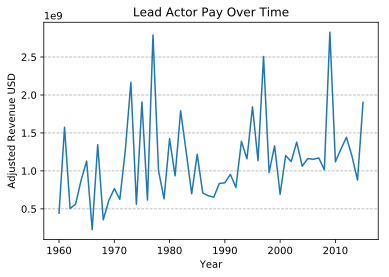

In [14]:
yearly_actors['revenue_adj'].plot(kind='line')
plt.title('Lead Actor Pay Over Time')
plt.xlabel('Year')
plt.ylabel('Adjusted Revenue USD')
ax = plt.gca()
ax.yaxis.grid(linestyle='--')

The lead actor who brought in the most revenue is **Tom Cruise** and there are several actors who were the most profitable for multiple years. Those actors include **Mark Hamill**, **Harrison Ford** and **Johnny Depp**. There is also a slight upward trend in how much movie revenue lead actors over time, however there appears to be a periodic cycle in maximum lead actor revenue over the same period.

### Are there any variables that are correlated to vote score?

### Select All Numerical Columns from the Original Datasets

In [15]:
numerical_df = movie_df.select_dtypes(include=["float64", "int"])
compare_df = numerical_df.drop(columns=['id', 'release_year'])
compare_df.head()

popularity     budget     revenue  runtime  vote_count  vote_average  \
0   32.985763  150000000  1513528810      124        5562           6.5   
1   28.419936  150000000   378436354      120        6185           7.1   
2   13.112507  110000000   295238201      119        2480           6.3   
3   11.173104  200000000  2068178225      136        5292           7.5   
4    9.335014  190000000  1506249360      137        2947           7.3   

     budget_adj   revenue_adj  
0  1.379999e+08  1.392446e+09  
1  1.379999e+08  3.481613e+08  
2  1.012000e+08  2.716190e+08  
3  1.839999e+08  1.902723e+09  
4  1.747999e+08  1.385749e+09

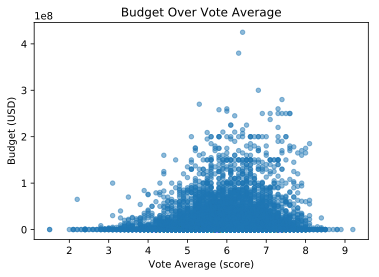

In [43]:
compare_df.plot(x='vote_average', y='budget', kind='scatter', alpha=0.5);
plt.title("Budget Over Vote Average")
plt.xlabel("Vote Average (score)")
plt.ylabel("Budget (USD)");

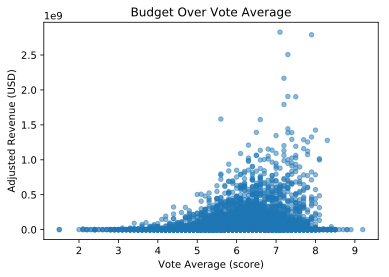

In [44]:
compare_df.plot(x='vote_average', y='revenue_adj', kind='scatter', alpha=0.5);
plt.title("Budget Over Vote Average")
plt.xlabel("Vote Average (score)")
plt.ylabel("Adjusted Revenue (USD)");

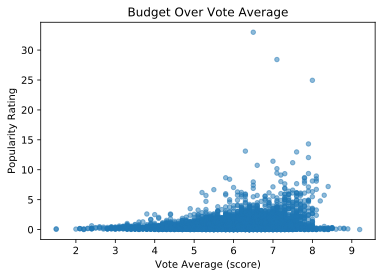

In [45]:
compare_df.plot(x='vote_average', y='popularity', kind='scatter', alpha=0.5);
plt.title("Budget Over Vote Average")
plt.xlabel("Vote Average (score)")
plt.ylabel("Popularity Rating");

For budget, adjusted revenue, and popularity rating there appears to be a positive linear correlation with voting ratings. However this trend isn't as observable near smaller values with a wider distribution of vote values being present. This is definitely a topic for further research as this suggests that these variables could potentially be predicted using vote scores in combination with other variables.

<a id='conclusions'></a>
## Conclusions

This analysis shows that using data cleaning, aggregations and visualization, business questions and trends that weren't expected can be revealed and clearly communicated. These results can then be used to make informe